In [1]:
import pandas as pd
import seaborn as sns
import scipy as sp
import math
import matplotlib.pyplot as plt
from plotly.offline import iplot
from scipy.spatial.distance import cosine
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import math 
import numpy as np
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('file_train_senza_outliers.csv', skipinitialspace=True) 

In [3]:
## Selezione colonne di interesse e 

## Selezione colonne e heatmap


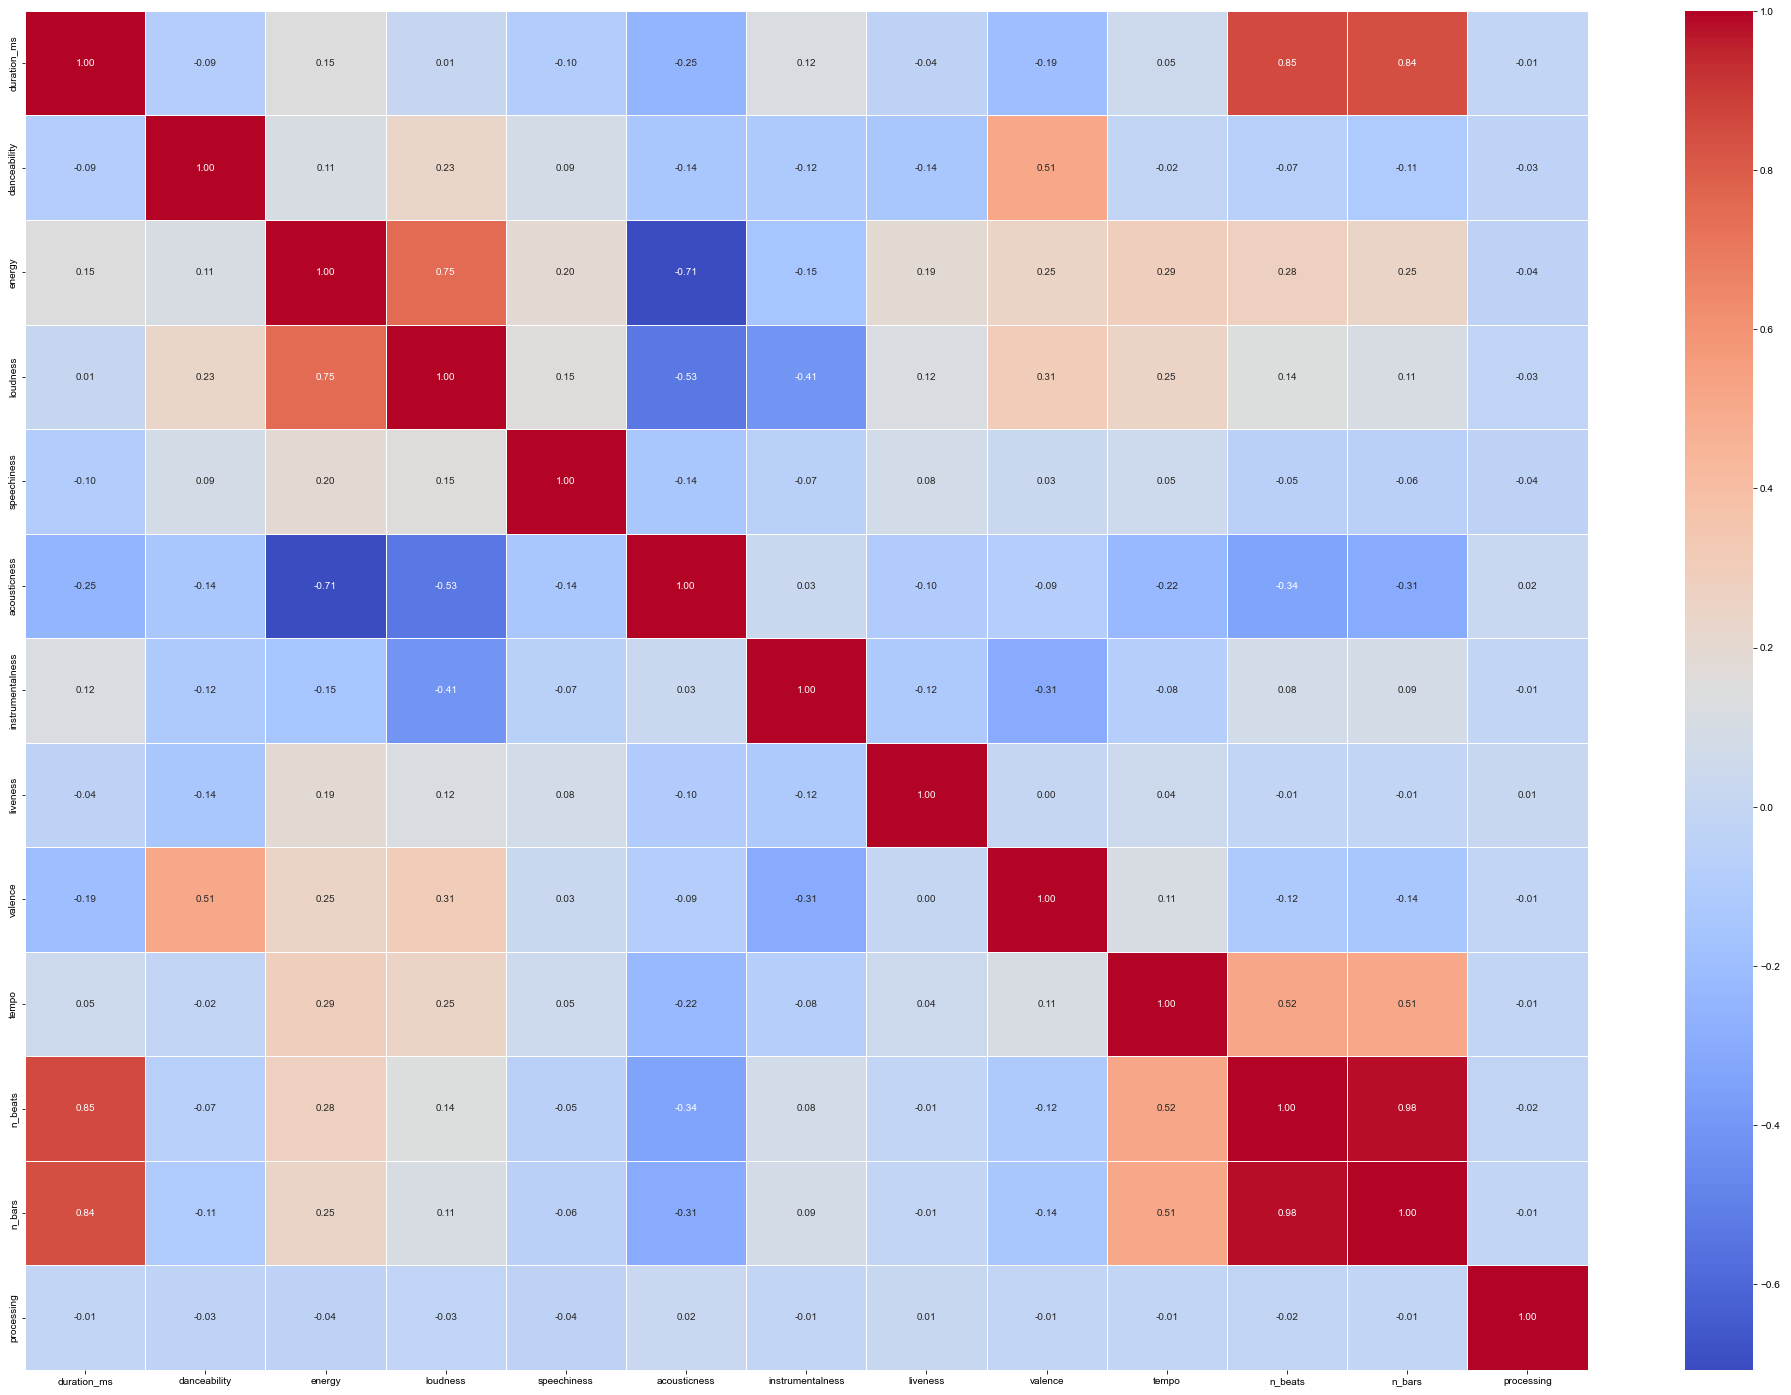

In [4]:
selected_columns = df[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]

plt.figure(figsize = (35, 25))
sns.heatmap(selected_columns.corr(),cmap='coolwarm', annot=True, fmt=".2f", linewidth='.8') 
sns.set(font_scale=1)

<h2>Standardizzazione delle variabili</h2>

In [5]:
#colonne=["n_bars", "n_beats"]
#df["n_bars"]=df["n_bars"]/df["n_bars"].max()
#df["n_beats"]=df["n_beats"]/df["n_beats"].max()
#df["duration_ms"]=df["duration_ms"]/1000
#df["time_signature"]=df["time_signature"]/df["time_signature"].max()
#df["loudness"]=df["loudness"]/df["loudness"].max()
#df["energy"]=df["energy"]/df["energy"].max()
#df["processing"]=df["processing"]/df["processing"].max()
#df["tempo"]=df["tempo"]/df["tempo"].max()
#df.head()

In [6]:
genres = sorted(df['genre'].unique())
genres_mapping = dict(zip(genres, range(0, len(genres) + 1)))
genres_mapping

{'afrobeat': 0,
 'black-metal': 1,
 'bluegrass': 2,
 'brazil': 3,
 'breakbeat': 4,
 'chicago-house': 5,
 'disney': 6,
 'forro': 7,
 'happy': 8,
 'idm': 9,
 'indian': 10,
 'industrial': 11,
 'iranian': 12,
 'j-dance': 13,
 'j-idol': 14,
 'mandopop': 15,
 'sleep': 16,
 'spanish': 17,
 'study': 18,
 'techno': 19}

<h2>Secondo data frame con i nan sostituiti dalla mediana</h2>

<h2>Terzo dataframe senza gli attributi della popolarità</h2>

<h2>X-Means</h2>

In [7]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [8]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<h1>Dalle lezioni dello scorso anno</h1>

In [9]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

<h2>Normalizzazione</h2>

In [10]:
X = df.select_dtypes(include=float).values
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

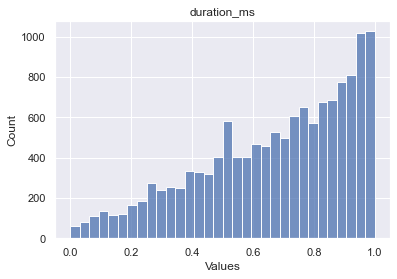

In [11]:
i = 2
sns.histplot(X[:,i])
plt.title(df.columns[i])
plt.xlabel("Values")
plt.show()

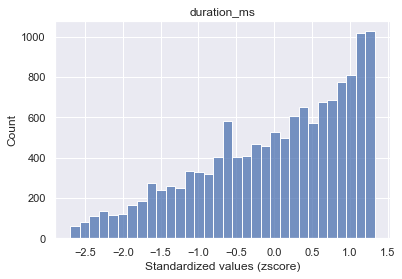

In [12]:
i = 2
sns.histplot(X_scal[:,i])
plt.title(df.columns[i])
plt.xlabel("Standardized values (zscore)")
plt.show()

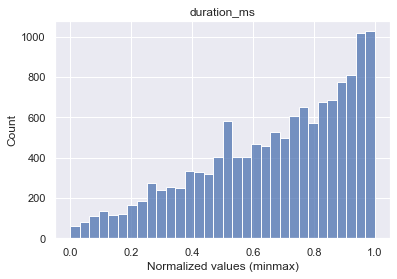

In [13]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

i = 2
sns.histplot(X_minmax[:,i])
plt.title(df.columns[i])
plt.xlabel("Normalized values (minmax)")
plt.show()

## Silhouette per il numero di clusters

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

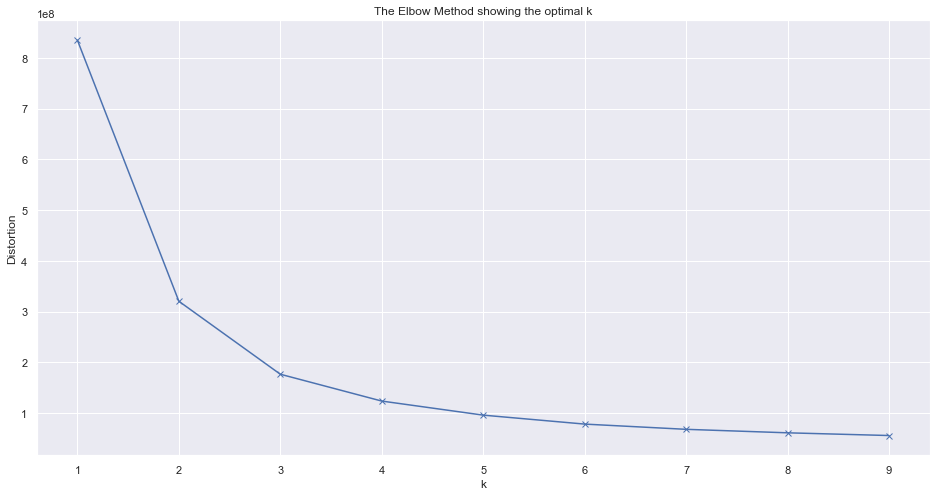

In [14]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(selected_columns)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<h2>K-means</h2>

In [50]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [51]:
centers = kmeans.cluster_centers_

In [52]:
slice_df = df
slice_df["duration_ms"] = df["duration_ms"][0:1500]
slice_df["n_beats"] = df["n_beats"][0:1500]

In [53]:
centers = scaler.inverse_transform(centers)

In [54]:
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C", 3: "D", 4: "F"})

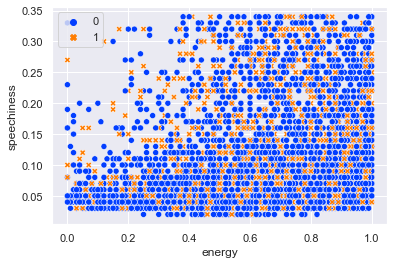

In [55]:
sns.scatterplot(data=df, x="energy", y="speechiness",  hue=kmeans.labels_, style=kmeans.labels_,
                palette="bright")
plt.legend()
#plt.scatter(centers[:,2], centers[:,10], c='black', marker='*', s=200)
plt.show()

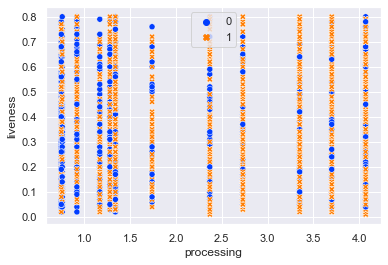

In [48]:
sns.scatterplot(data=df, y="liveness", x="processing",  hue=kmeans.labels_, style=kmeans.labels_,
                palette="bright")
plt.legend()
#plt.scatter(centers[:,2], centers[:,10], c='black', marker='*', s=200)
plt.show()

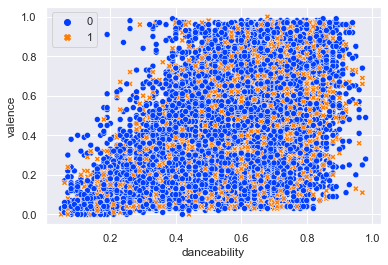

In [56]:
sns.scatterplot(data=slice_df, y="valence", x="danceability",  hue=kmeans.labels_, style=kmeans.labels_,
                palette="bright")
plt.legend()
#plt.scatter(centers[:,13], centers[:,12], c='black', marker='*', s=200)
plt.show()

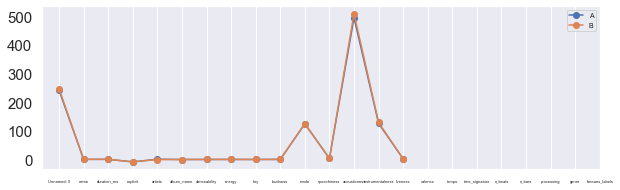

In [23]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C', 'D', 'E']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(df.columns)), df.columns, fontsize=4)
plt.yticks(fontsize=15)

plt.legend(fontsize=7, loc='best')
plt.grid(axis='y')

Altro tentativo

In [24]:
from pyclustering.cluster import xmeans

In [25]:
import warnings
np.warnings = warnings
xm = xmeans.xmeans(X_minmax)
xm.process()

In [26]:
clusters = xm.get_clusters()

In [27]:
def clusters_to_labels(clusters):
    labels = np.empty(shape=(len(np.concatenate(clusters))), dtype=int)
    for i in range(len(clusters)):
        for idx in clusters[i]:
            labels[idx] = i
    return labels

In [28]:
labels = clusters_to_labels(clusters)

In [29]:
centers = np.array(xm.get_centers())
centers_unscaled = scaler.inverse_transform(centers)

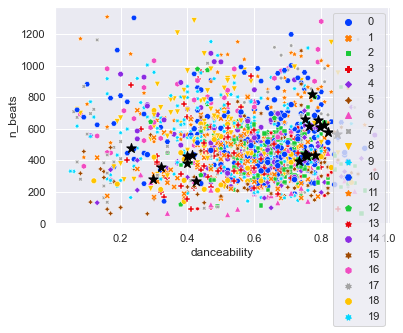

In [30]:
sns.scatterplot(data=df, x="danceability", y="n_beats", hue=labels, palette="bright", style=labels)
plt.scatter(centers_unscaled[:, 2], centers_unscaled[:,12], color="black", marker="*", s=100)

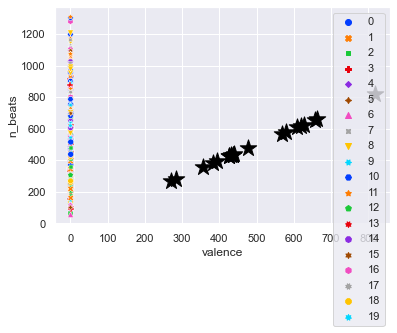

In [31]:
sns.scatterplot(data=df, y="n_beats", x="valence", hue=labels, palette="bright", style=labels)
plt.scatter(centers_unscaled[:, 12], centers_unscaled[:,12], color="black", marker="*", s=300)

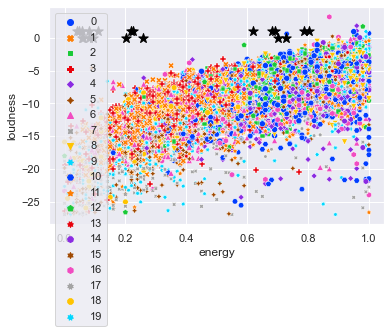

In [32]:
sns.scatterplot(data=df, y="loudness", x="energy", hue=labels, palette="bright", style=labels)
plt.scatter(centers_unscaled[:, 6], centers_unscaled[:, 4], color="black", marker="*", s=100)

<h2>DBScan</h2>

In [57]:
dbscan = DBSCAN(eps=0.55, min_samples=5, metric='euclidean')
dbscan.fit(X_minmax)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(df.select_dtypes(include=float), dbscan.labels_))

labels {-1: 264, 0: 9830, 1: 3420, 2: 6, 3: 8, 4: 8, 5: 5, 6: 6, 7: 0}


ValueError: Input X contains NaN.

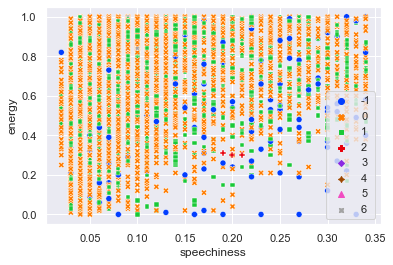

In [58]:
sns.scatterplot(data=df, y="energy", x="speechiness",  hue=dbscan.labels_, 
                style=dbscan.labels_, palette="bright")
plt.show()

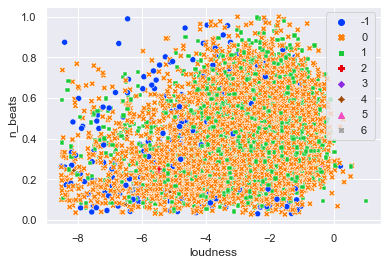

In [ ]:
sns.scatterplot(data=df, y="n_beats", x="loudness",  hue=dbscan.labels_, style=dbscan.labels_,
                palette="bright")
plt.show()

<h2></h2>

<h2>Kth neigbouhood distance</h2>

In [73]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

In [ ]:
#sns.heatmap(dist, cmap="Greens_r", annot=False)
#plt.show()

In [74]:
k=5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k] 
    kth_distances.append(d[index_kth_distance]) 

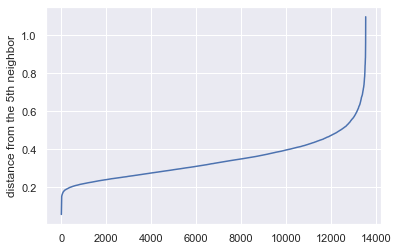

In [75]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

<h2>Hierarchical</h2>

In [77]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [78]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='complete')
model = model.fit(X_minmax)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



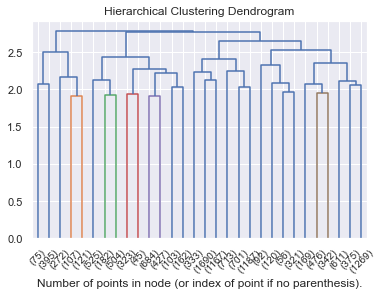

In [79]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [80]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hier.fit(X_minmax)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [81]:
hier = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
hier.fit(dist)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='precomputed', linkage='complete')

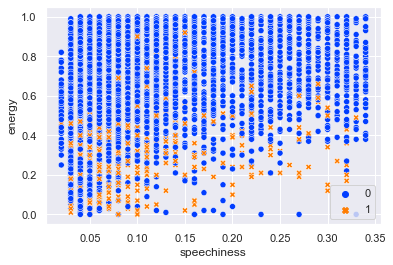

In [82]:
sns.scatterplot(data=df, y="energy", x="speechiness",  hue=hier.labels_, style=hier.labels_,
                palette="bright")
plt.show()

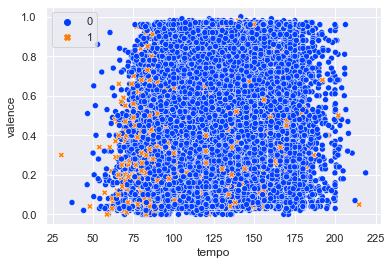

In [83]:
sns.scatterplot(data=df, y="valence", x="tempo",  hue=hier.labels_, 
                style=hier.labels_, palette="bright")
plt.show()

Altro tentativo (da internet)

In [84]:
import scipy.cluster.hierarchy as shc

ValueError: The condensed distance matrix must contain only finite values.

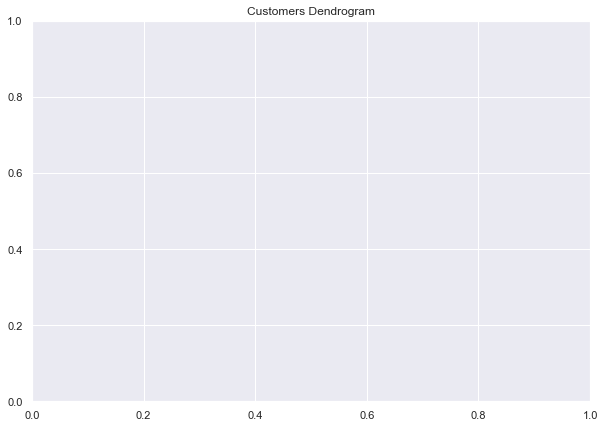

In [85]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
# selected_data = df2.iloc[:, 1:3]
clusters = shc.linkage(df.select_dtypes(include=float), 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()